<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
sample = pd.read_csv('sample_submission.csv')

In [6]:
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
df = pd.concat([train, test])

In [9]:
df.shape

(2919, 81)

In [10]:
df.set_index(keys = 'Id', inplace = True)

In [11]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [13]:
def check_null(data_frame):
        for col in data_frame.columns:
            if data_frame[col].isnull().sum()!= 0:
                print("|",col,"  ---->  ",data_frame[col].isnull().sum(),"\n","_______________________________")
            else:
                pass

In [14]:
def null_columns(data_frame):
        null_col_list = []
        for col in data_frame.columns:
            if data_frame[col].isnull().sum()!= 0:
                null_col_list.append(col)
            else:
                pass
        print(null_col_list)

In [15]:
check_null(df)

| MSZoning   ---->   4 
 _______________________________
| LotFrontage   ---->   486 
 _______________________________
| Alley   ---->   2721 
 _______________________________
| Utilities   ---->   2 
 _______________________________
| Exterior1st   ---->   1 
 _______________________________
| Exterior2nd   ---->   1 
 _______________________________
| MasVnrType   ---->   24 
 _______________________________
| MasVnrArea   ---->   23 
 _______________________________
| BsmtQual   ---->   81 
 _______________________________
| BsmtCond   ---->   82 
 _______________________________
| BsmtExposure   ---->   82 
 _______________________________
| BsmtFinType1   ---->   79 
 _______________________________
| BsmtFinSF1   ---->   1 
 _______________________________
| BsmtFinType2   ---->   80 
 _______________________________
| BsmtFinSF2   ---->   1 
 _______________________________
| BsmtUnfSF   ---->   1 
 _______________________________
| TotalBsmtSF   ---->   1 
 ____________________

In [16]:
null_columns(df)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## MSZoning

In [17]:
df.MSZoning.value_counts(dropna = False)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64

In [18]:
import random

df['MSZoning'].fillna(random.choice(df['MSZoning'][df['MSZoning'].notna()]), inplace = True)

## LotFrontage

In [19]:
df.LotFrontage.value_counts(dropna = False)

NaN      486
60.0     276
80.0     137
70.0     133
50.0     117
        ... 
138.0      1
31.0       1
144.0      1
141.0      1
28.0       1
Name: LotFrontage, Length: 129, dtype: int64

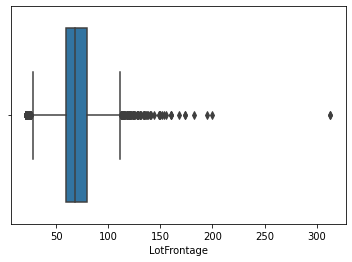

In [20]:
sns.boxplot(df.LotFrontage);

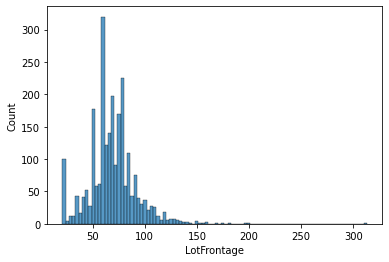

In [21]:
sns.histplot(df.LotFrontage);

In [22]:
df.LotFrontage.mean()

69.30579531442663

In [23]:
df.LotFrontage.fillna(df.LotFrontage.mean(), inplace=True)

In [24]:
df.LotFrontage.value_counts(dropna = False)

69.305795     486
60.000000     276
80.000000     137
70.000000     133
50.000000     117
             ... 
144.000000      1
111.000000      1
123.000000      1
155.000000      1
31.000000       1
Name: LotFrontage, Length: 129, dtype: int64

<br>

## Alley

In [25]:
df.Alley.value_counts(dropna = False)

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

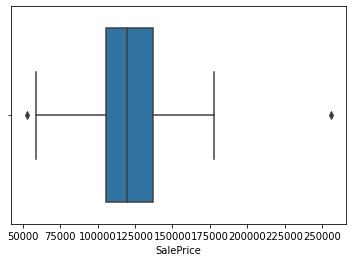

In [26]:
sns.boxplot(df[df.Alley == 'Grvl'].SalePrice);

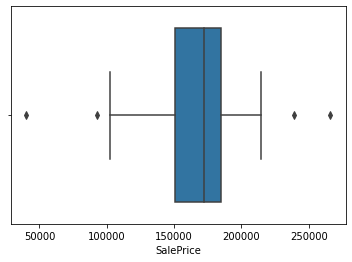

In [27]:
sns.boxplot(df[df.Alley == 'Pave'].SalePrice);

In [28]:
df.drop('Alley', axis = 1, inplace = True)

In [29]:
null_columns(df)

['Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

##  Utilities

In [30]:
df.Utilities.value_counts(dropna=False)

AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

In [31]:
Utilities_index = df[df.Utilities.isnull()].index
df.Utilities.loc[Utilities_index] = df.Utilities.loc[Utilities_index].fillna('AllPub')

In [32]:
null_columns(df)

['Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

In [33]:
df.Exterior1st.value_counts(dropna = False)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
NaN           1
ImStucc       1
Name: Exterior1st, dtype: int64

In [34]:
Ext_1_index = df[df.Exterior1st.isnull()].index
df.Exterior1st.loc[Ext_1_index] = df.Exterior1st.loc[Ext_1_index].fillna('Other')

In [35]:
Ext_1_index_2 = df[(df.Exterior1st == 'CBlock') | (df.Exterior1st == 'AsphShn') | (df.Exterior1st == 'BrkComm') | (df.Exterior1st == 'Stone') |(df.Exterior1st == 'ImStucc') ].index

In [36]:
df.Exterior1st.loc[Ext_1_index_2] = 'Other'

In [37]:
null_columns(df)

['Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## Exterior2nd

In [38]:
df.Exterior2nd.value_counts(dropna = False)

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
NaN           1
Other         1
Name: Exterior2nd, dtype: int64

In [39]:
Ext_2_index = df[df.Exterior2nd.isnull()].index
df.Exterior2nd.loc[Ext_2_index] = df.Exterior2nd.loc[Ext_2_index].fillna('Other')

In [40]:
Ext_2_index_2 = df[(df.Exterior2nd == 'CBlock') | (df.Exterior2nd == 'AsphShn') | (df.Exterior2nd == 'Brk Cmn') | (df.Exterior2nd == 'Stone') |(df.Exterior2nd == 'ImStucc') ].index

In [41]:
df.Exterior2nd.loc[Ext_2_index_2] = 'Other'

In [42]:
null_columns(df)

['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## MasVnrType

In [43]:
df.MasVnrType.value_counts(dropna = False)

None       1742
BrkFace     879
Stone       249
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

In [44]:
df.MasVnrType.fillna('None', inplace = True)

In [45]:
df.MasVnrType.value_counts(dropna = False)

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

<br>

## MasVnrArea

In [46]:
df.MasVnrArea.value_counts(dropna = False)

0.0       1738
NaN         23
120.0       15
200.0       13
176.0       13
          ... 
571.0        1
207.0        1
34.0         1
550.0        1
1159.0       1
Name: MasVnrArea, Length: 445, dtype: int64

In [47]:
df.MasVnrArea.fillna(0, inplace = True)

<br>

## BsmtQual

In [48]:
df.BsmtQual.value_counts(dropna = False)

TA     1283
Gd     1209
Ex      258
Fa       88
NaN      81
Name: BsmtQual, dtype: int64

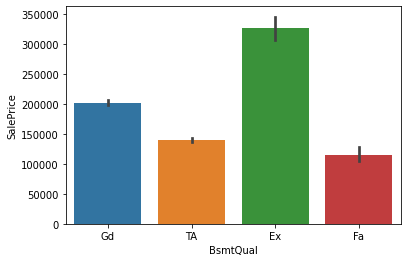

In [49]:
sns.barplot(x = df.BsmtQual, y = df.SalePrice);

In [50]:
df.BsmtQual.fillna('NoBsmt', inplace = True)

<br>

## BsmtCond

In [51]:
df.BsmtCond.value_counts(dropna = False)

TA     2606
Gd      122
Fa      104
NaN      82
Po        5
Name: BsmtCond, dtype: int64

In [52]:
df.BsmtCond.fillna('NoBsmt', inplace = True)

<br>

## BsmtExposure

In [53]:
df.BsmtExposure.value_counts(dropna = False)

No     1904
Av      418
Gd      276
Mn      239
NaN      82
Name: BsmtExposure, dtype: int64

In [54]:
df.BsmtExposure.fillna('NoBsmt', inplace = True)

In [55]:
null_columns(df)

['BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## BsmtFinType1

In [56]:
df.BsmtFinType1.value_counts(dropna = False)

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NaN     79
Name: BsmtFinType1, dtype: int64

In [57]:
df.BsmtFinType1.fillna('NoBsmt', inplace = True)

<br>

## BsmtFinType2

In [58]:
df.BsmtFinType2.value_counts(dropna = False)

Unf    2493
Rec     105
LwQ      87
NaN      80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [59]:
df.BsmtFinType2.fillna('NoBsmt', inplace = True)

<br>

## BsmtFinSF1

In [60]:
df.BsmtFinSF1.value_counts(dropna = False)

0.0       929
24.0       27
16.0       14
300.0       9
384.0       8
         ... 
952.0       1
607.0       1
440.0       1
1236.0      1
344.0       1
Name: BsmtFinSF1, Length: 992, dtype: int64

In [61]:
df[df.BsmtFinSF1.isnull()].index

Int64Index([2121], dtype='int64', name='Id')

In [62]:
df.drop(index = df[df.BsmtFinSF1.isnull()].index, inplace=True)

<br>

## BsmtFinSF2

In [63]:
df.BsmtFinSF2.value_counts(dropna = False)

0.0      2571
294.0       5
180.0       5
168.0       3
162.0       3
         ... 
382.0       1
449.0       1
350.0       1
499.0       1
208.0       1
Name: BsmtFinSF2, Length: 272, dtype: int64

In [64]:
df[df.BsmtFinSF2.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


<br>

## Electrical

In [65]:
df.Electrical.value_counts(dropna = False)

SBrkr    2671
FuseA     187
FuseF      50
FuseP       8
NaN         1
Mix         1
Name: Electrical, dtype: int64

In [66]:
nan_index_el = df[df.Electrical.isnull()].index
df.drop(index = nan_index_el, inplace = True)

In [67]:
null_columns(df)

['BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## BsmtFullBath

In [68]:
df.BsmtFullBath.value_counts(dropna = False)

0.0    1704
1.0    1172
2.0      38
3.0       2
NaN       1
Name: BsmtFullBath, dtype: int64

In [69]:
df[df.BsmtFullBath.isnull()].index

Int64Index([2189], dtype='int64', name='Id')

In [70]:
df.BsmtFullBath.loc[df[df.BsmtFullBath.isnull()].index] = 0

<br>

## BsmtHalfBath

In [71]:
df.BsmtHalfBath.value_counts(dropna = False)

0.0    2741
1.0     171
2.0       4
NaN       1
Name: BsmtHalfBath, dtype: int64

In [72]:
df[df.BsmtHalfBath.isnull()].index
df.BsmtHalfBath.loc[df[df.BsmtHalfBath.isnull()].index] = 0

<br>

## KitchenQual

In [73]:
df.KitchenQual.value_counts(dropna = False)

TA     1491
Gd     1150
Ex      205
Fa       70
NaN       1
Name: KitchenQual, dtype: int64

In [74]:
import random

df['KitchenQual'].fillna(random.choice(df['KitchenQual'][df['KitchenQual'].notna()]), inplace = True)

<br>

## Functional

In [75]:
df.Functional.value_counts(dropna = False)

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
NaN        2
Sev        2
Name: Functional, dtype: int64

In [76]:
df_Func_index = df[(df.Functional == 'Sev') | (df.Functional == 'Maj2') | (df.Functional == 'Maj1') | (df.Functional.isnull())].index

In [77]:
df.Functional.loc[df_Func_index] = 'Other'

<br>

## FireplaceQu

In [78]:
df.FireplaceQu.value_counts(dropna = False)

NaN    1418
Gd      744
TA      592
Fa       74
Po       46
Ex       43
Name: FireplaceQu, dtype: int64

In [79]:
df.FireplaceQu.fillna('NoFirePlace', inplace = True)

In [80]:
null_columns(df)

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## GarageType

In [81]:
df.GarageType.value_counts(dropna = False)

Attchd     1723
Detchd      778
BuiltIn     185
NaN         157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [82]:
df.GarageType.fillna('NoGarage', inplace = True)

<br>

##  GarageYrBlt

In [83]:
df.GarageYrBlt.value_counts(dropna = False)

NaN       159
2005.0    142
2006.0    115
2007.0    114
2004.0     99
         ... 
1908.0      1
1919.0      1
1896.0      1
1933.0      1
1943.0      1
Name: GarageYrBlt, Length: 104, dtype: int64

In [84]:
df[(df.GarageYrBlt.isna())].GarageYrBlt = df[(df.GarageYrBlt.isna())].YearBuilt

In [85]:
garage_index = df[(df.GarageYrBlt.isna())].index
fill_garage = df[(df.GarageYrBlt.isna())].YearBuilt

In [86]:
df.GarageYrBlt.loc[garage_index] = df.GarageYrBlt.loc[garage_index].fillna(value = fill_garage)

<br>

## GarageFinish

In [87]:
df.GarageFinish.value_counts(dropna = False)

Unf    1229
RFn     811
Fin     718
NaN     159
Name: GarageFinish, dtype: int64

In [88]:
df.GarageFinish.fillna('NoGarage', inplace = True)

In [89]:
null_columns(df)

['GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## GarageCars

In [90]:
df.GarageCars.value_counts(dropna=False)

2.0    1593
1.0     775
3.0     374
0.0     157
4.0      16
5.0       1
NaN       1
Name: GarageCars, dtype: int64

In [91]:
df.GarageCars[df.GarageCars.isnull()] = 0

<br>

## GarageArea

In [92]:
df.GarageArea.value_counts(dropna=False)

0.0       157
576.0      97
440.0      96
240.0      69
484.0      68
         ... 
475.0       1
1110.0      1
766.0       1
815.0       1
428.0       1
Name: GarageArea, Length: 604, dtype: int64

In [93]:
df[df.GarageArea.isnull()].GarageFinish

Id
2577    NoGarage
Name: GarageFinish, dtype: object

In [94]:
df.GarageArea[df.GarageArea.isnull()] = 0

<br>

## GarageQual

In [95]:
df.GarageQual.value_counts(dropna = False)

TA     2602
NaN     159
Fa      124
Gd       24
Po        5
Ex        3
Name: GarageQual, dtype: int64

In [96]:
df.GarageQual.fillna('NoGarage', inplace = True)

<br>

## GarageCond

In [97]:
df.GarageCond.value_counts(dropna = False)

TA     2652
NaN     159
Fa       74
Gd       15
Po       14
Ex        3
Name: GarageCond, dtype: int64

In [98]:
df.GarageCond.fillna('NoGarage', inplace = True)

In [99]:
null_columns(df)

['PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## PoolQC

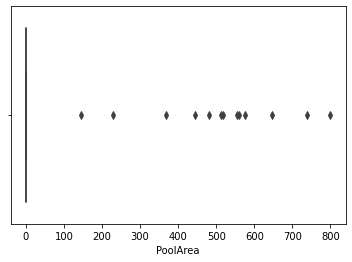

In [100]:
sns.boxplot(df.PoolArea);

In [101]:
df.drop('PoolArea', axis = 1, inplace = True)

In [102]:
df.PoolQC.value_counts(dropna = False)

NaN    2907
Gd        4
Ex        4
Fa        2
Name: PoolQC, dtype: int64

In [103]:
df.PoolQC.fillna('0', inplace = True)
pool_index = df[df.PoolQC != '0'].PoolQC.index

In [104]:
df.PoolQC.loc[pool_index] = 1
df.PoolQC.loc[pool_index]

Id
198     1
811     1
1171    1
1183    1
1299    1
1387    1
1424    1
1975    1
2574    1
2711    1
Name: PoolQC, dtype: object

In [105]:
no_pool_index = train[train.PoolQC != 1].index
train.PoolQC.loc[no_pool_index] = 0
train.PoolQC.loc[no_pool_index].value_counts()

0    1460
Name: PoolQC, dtype: int64

In [106]:
df.PoolQC = df.PoolQC.astype(int)

In [107]:
df.PoolQC.value_counts()

0    2907
1      10
Name: PoolQC, dtype: int64

In [108]:
null_columns(df)

['Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## Fence

In [109]:
df.Fence.value_counts(dropna = False)

NaN      2347
MnPrv     328
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [110]:
df.Fence.fillna('NoFence', inplace = True)

<br>

## MiscFeature

In [111]:
df.MiscFeature.value_counts(dropna = False)

NaN     2812
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

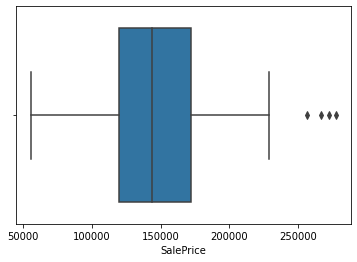

In [112]:
sns.boxplot(df[df.MiscFeature == 'Shed'].SalePrice);

In [113]:
df.drop('MiscFeature', axis = 1, inplace = True)

In [114]:
null_columns(df)

['SaleType', 'SalePrice']


<br>

## SaleType

In [115]:
df.SaleType.value_counts(dropna = False)

WD       2524
New       239
COD        87
ConLD      25
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64

In [116]:
df_ST_index = df[(df.SaleType == 'ConLD') | (df.SaleType == 'CWD') | (df.SaleType == 'ConLI') | (df.SaleType.isnull() | (df.SaleType == 'ConLw')| (df.SaleType == 'Oth')| (df.SaleType == 'Con'))].index

In [117]:
df.SaleType.loc[df_ST_index] = 'Other'

In [118]:
null_columns(df)

['SalePrice']


In [119]:
df.shape

(2917, 77)

In [120]:
df1 = df.copy()

In [121]:
for col in df.columns:
    if df[col].dtypes == 'object':
        for i in df[col].value_counts().index:
            if df[df[col] == i][col].count() < 6 :
                drop_index = df[df[col] == i].index
                for j in drop_index:
                    df.drop(index = j, axis = 0, inplace = True)

In [122]:
df.shape

(2860, 77)

In [123]:
train = df[df.SalePrice.notna()]

In [124]:
test = df[df.SalePrice.isna()]

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 1 to 1460
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1425 non-null   int64  
 1   MSZoning       1425 non-null   object 
 2   LotFrontage    1425 non-null   float64
 3   LotArea        1425 non-null   int64  
 4   Street         1425 non-null   object 
 5   LotShape       1425 non-null   object 
 6   LandContour    1425 non-null   object 
 7   Utilities      1425 non-null   object 
 8   LotConfig      1425 non-null   object 
 9   LandSlope      1425 non-null   object 
 10  Neighborhood   1425 non-null   object 
 11  Condition1     1425 non-null   object 
 12  Condition2     1425 non-null   object 
 13  BldgType       1425 non-null   object 
 14  HouseStyle     1425 non-null   object 
 15  OverallQual    1425 non-null   int64  
 16  OverallCond    1425 non-null   int64  
 17  YearBuilt      1425 non-null   int64  
 18  YearRemo

In [126]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 1461 to 2919
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1435 non-null   int64  
 1   MSZoning       1435 non-null   object 
 2   LotFrontage    1435 non-null   float64
 3   LotArea        1435 non-null   int64  
 4   Street         1435 non-null   object 
 5   LotShape       1435 non-null   object 
 6   LandContour    1435 non-null   object 
 7   Utilities      1435 non-null   object 
 8   LotConfig      1435 non-null   object 
 9   LandSlope      1435 non-null   object 
 10  Neighborhood   1435 non-null   object 
 11  Condition1     1435 non-null   object 
 12  Condition2     1435 non-null   object 
 13  BldgType       1435 non-null   object 
 14  HouseStyle     1435 non-null   object 
 15  OverallQual    1435 non-null   int64  
 16  OverallCond    1435 non-null   int64  
 17  YearBuilt      1435 non-null   int64  
 18  YearR

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2860 entries, 1 to 2919
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2860 non-null   int64  
 1   MSZoning       2860 non-null   object 
 2   LotFrontage    2860 non-null   float64
 3   LotArea        2860 non-null   int64  
 4   Street         2860 non-null   object 
 5   LotShape       2860 non-null   object 
 6   LandContour    2860 non-null   object 
 7   Utilities      2860 non-null   object 
 8   LotConfig      2860 non-null   object 
 9   LandSlope      2860 non-null   object 
 10  Neighborhood   2860 non-null   object 
 11  Condition1     2860 non-null   object 
 12  Condition2     2860 non-null   object 
 13  BldgType       2860 non-null   object 
 14  HouseStyle     2860 non-null   object 
 15  OverallQual    2860 non-null   int64  
 16  OverallCond    2860 non-null   int64  
 17  YearBuilt      2860 non-null   int64  
 18  YearRemo

In [128]:
test.drop('SalePrice', axis = 1, inplace = True)

<AxesSubplot:>

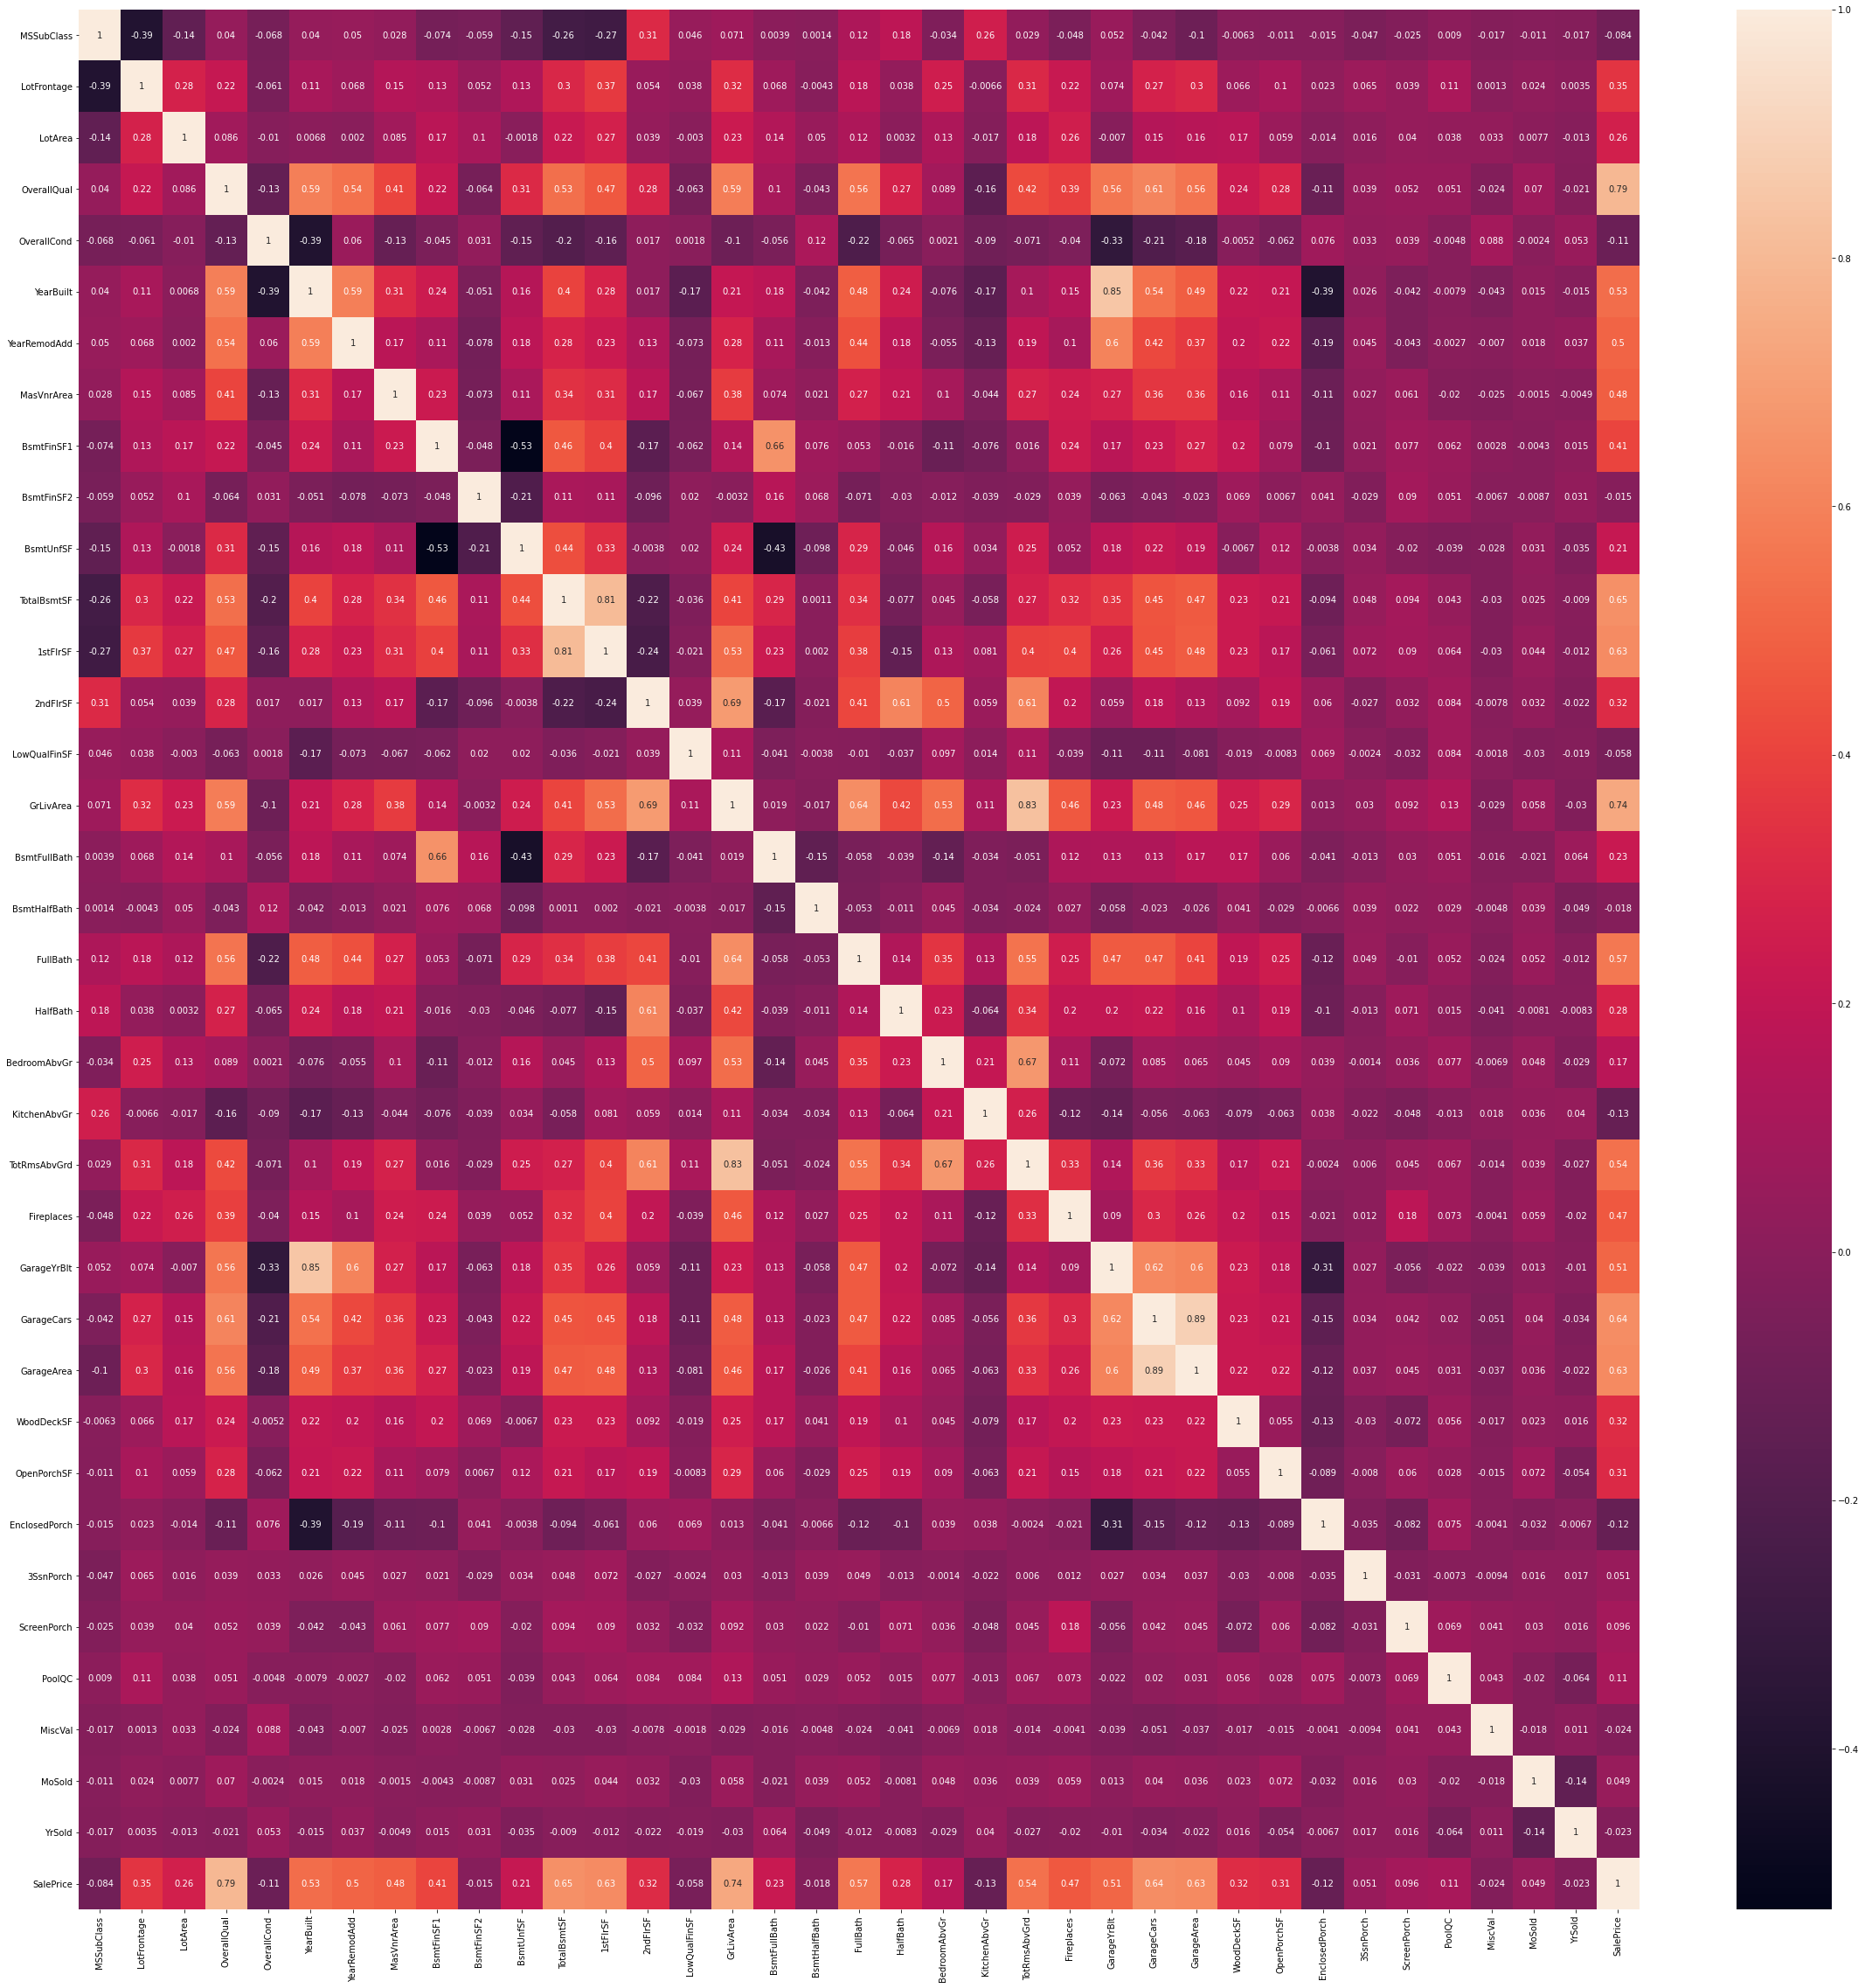

In [129]:
plt.figure(figsize=(40,40))
sns.heatmap(train.corr(), annot=True)

In [130]:
df_numeric = df.select_dtypes(include='number')

In [131]:
df_numeric.corr()[(df_numeric.corr()>= 0.90) & (df_numeric.corr() < 1)].any() 

MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolQC           False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [132]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

## Get dummies

In [133]:
train.shape

(1425, 77)

In [134]:
test.shape

(1435, 76)

In [135]:
train = pd.get_dummies(train, drop_first = True)

In [136]:
train.shape

(1425, 212)

In [137]:
test = pd.get_dummies(test, drop_first = True)

In [138]:
test.shape

(1435, 209)

<br>

# Linear Reg Model

<br>

In [139]:
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fence_MnWw,Fence_NoFence,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,1,0,0,1,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,1,0,0,1,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,1,0,0,1,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,1,0,0,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,0,1,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,0,1,0,0,0,1,0


## Train - Test Split

In [140]:
X = train.drop(columns ="SalePrice")
y = train["SalePrice"]

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
model = LinearRegression()

In [143]:
model

LinearRegression()

In [144]:
model.fit(X_train, y_train)

LinearRegression()

In [145]:
y_pred = model.predict(X_test)

In [146]:
my_dict = {"Actual":y_test, "pred": y_pred, 'residuals': y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare

,Actual,pred,residuals
Id,,,
646,143250.0,130101.425815,13148.574185
698,123500.0,152712.259577,-29212.259577
1109,181000.0,167715.210280,13284.789720
596,319000.0,359062.381300,-40062.381300
1033,310000.0,306694.783954,3305.216046
...,...,...,...
1045,278000.0,381771.610631,-103771.610631
404,258000.0,275094.557025,-17094.557025
589,143000.0,264670.877138,-121670.877138


In [147]:
residuals = y_test-y_pred

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

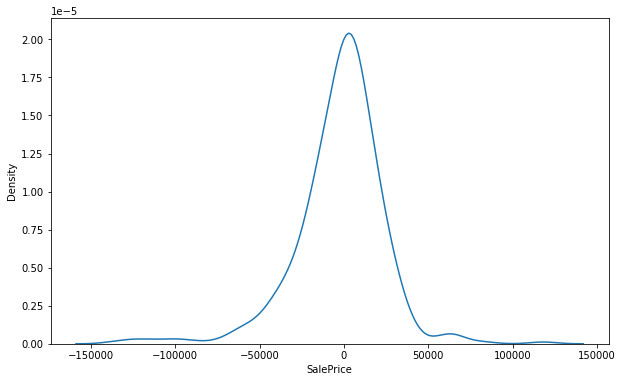

In [148]:
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals)

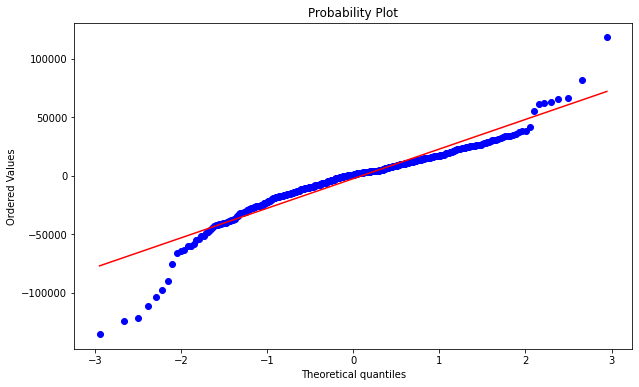

In [149]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt);

In [150]:
model.score(X_train, y_train)

0.9455124834689859

In [151]:
model.score(X_test, y_test)

0.8743558022113328

In [152]:
import sklearn.metrics 

In [153]:
def eval_metric(actual, pred):
    mae = sklearn.metrics.mean_absolute_error(actual, pred)
    mse = sklearn.metrics.mean_squared_error(actual, pred)
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(actual, pred))
    score = sklearn.metrics.r2_score(actual, pred)
    return print("r2_score:", score, "\n", "mae:", mae, "\n", "mse", mse, "\n", "rmse", rmse)

In [154]:
eval_metric(y_test,y_pred)

r2_score: 0.8743558022113328 
 mae: 17949.628353769654 
 mse 706916105.391391 
 rmse 26587.893963068815


In [155]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=10)
scores.mean()

0.8918996860908017

### Prediction Error

In [156]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

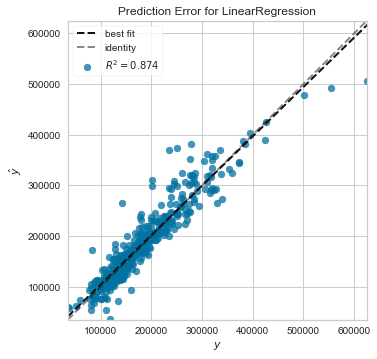

In [157]:
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

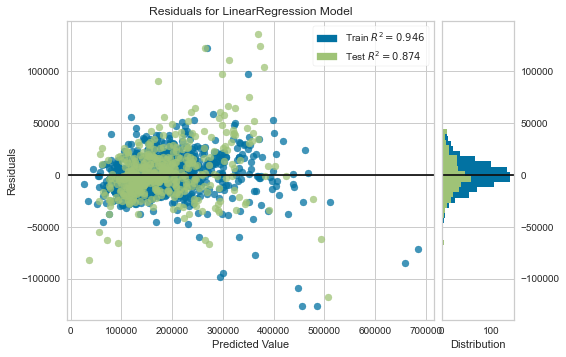

In [158]:
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

## Min_Max Scale

In [159]:
from sklearn.preprocessing import MinMaxScaler

In [160]:
scaler = MinMaxScaler()

In [161]:
scaler.fit(X_train)

MinMaxScaler()

In [162]:
X_train_scaled = scaler.transform(X_train)

In [163]:
X_test_scaled = scaler.transform(X_test)

In [164]:
model = LinearRegression()

In [165]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [166]:
y_pred=model.predict(X_test_scaled)

In [167]:
eval_metric(y_test,y_pred)

r2_score: -5.0170462589407866e+17 
 mae: 2568117500594.5674 
 mse 2.822757329315183e+27 
 rmse 53129627603769.09


In [168]:
from sklearn.model_selection import cross_val_score

In [169]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

## Ridge Regression

In [170]:
ridge_model = Ridge(alpha=1)

In [171]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [172]:
ridge_model.score(X_train_scaled, y_train)

0.942850213724299

In [173]:
ridge_model.score(X_test_scaled, y_test)

0.8897568569380572

In [174]:
y_pred = ridge_model.predict(X_test_scaled)

In [175]:
eval_metric(y_test,y_pred)

r2_score: 0.8897568569380572 
 mae: 16676.092533641626 
 mse 620264641.8303919 
 rmse 24905.112764859987


In [176]:
ridge_model.alpha

1

In [177]:
alpha_space = np.linspace(0.01,10,100)

In [178]:
alpha_space

array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.13818182,  3.23909091,  3.34      ,  3.44090909,
        3.54181818,  3.64272727,  3.74363636,  3.84454545,  3.94545455,
        4.04636364,  4.14727273,  4.24818182,  4.34909091,  4.45      ,
        4.55090909,  4.65181818,  4.75272727,  4.85363636,  4.95454545,
        5.05545455,  5.15636364,  5.25727273,  5.35818182,  5.45909091,
        5.56      ,  5.66090909,  5.76181818,  5.86272727,  5.96363636,
        6.06454545,  6.16545455,  6.26636364,  6.36727273,  6.46818182,
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97

In [179]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=10)

In [180]:
ridgecv.alpha_

1.5236363636363637

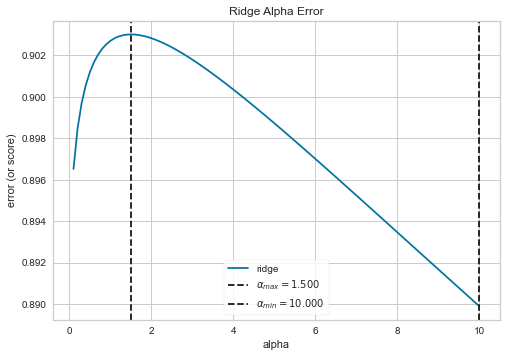

In [181]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 10, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train_scaled, y_train)
visualizer.show();

In [182]:
y_pred=ridgecv.predict(X_test_scaled)

In [183]:
eval_metric(y_test,y_pred)

r2_score: 0.8933523601369509 
 mae: 16447.826646811744 
 mse 600035143.2700256 
 rmse 24495.614776323244


## Lasso Regression

In [184]:
lasso_model = Lasso()

In [185]:
lasso_model.fit(X_train, y_train)

Lasso()

In [186]:
lasso_model.score(X_train, y_train)

0.9454911178788559

In [187]:
lasso_model.score(X_test, y_test)

0.8752248635314436

In [188]:
y_pred = lasso_model.predict(X_test)

In [189]:
eval_metric(y_test, y_pred)

r2_score: 0.8752248635314436 
 mae: 17875.035294960748 
 mse 702026476.9439844 
 rmse 26495.782248199135


<br>

## Elastic-Net

In [190]:
elastic_model = ElasticNet()

In [191]:
elastic_model.fit(X_train, y_train)

ElasticNet()

In [192]:
elastic_model.score(X_train, y_train)

0.8875268032221975

In [193]:
elastic_model.score(X_test, y_test)

0.8706709744182468

<br>

## KNN Regression

In [194]:
from sklearn.neighbors import KNeighborsRegressor

In [195]:
knn = KNeighborsRegressor(n_jobs=-1)

In [196]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_jobs=-1)

In [197]:
y_pred = knn.predict(X_test_scaled)

In [198]:
eval_metric(y_test, y_pred)

r2_score: 0.7526972211116082 
 mae: 25355.002336448597 
 mse 1391407803.7913086 
 rmse 37301.579105867735


In [199]:
rmse_val = []
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_scaled, y_train)
    pred=model.predict(X_test_scaled)
    score = sklearn.metrics.r2_score(y_test, pred)
    rmse_val.append(score) #store rmse values
    print('R2 value for k= ' , K , 'is:', score)

R2 value for k=  1 is: 0.5648224741662041
R2 value for k=  2 is: 0.6700455756665256
R2 value for k=  3 is: 0.720907382117222
R2 value for k=  4 is: 0.7381419654508956
R2 value for k=  5 is: 0.7526972211116082
R2 value for k=  6 is: 0.7550409723224705
R2 value for k=  7 is: 0.7499404152614422
R2 value for k=  8 is: 0.7521764027313649
R2 value for k=  9 is: 0.7500994379777277
R2 value for k=  10 is: 0.7461780603870516
R2 value for k=  11 is: 0.7435261169166436
R2 value for k=  12 is: 0.7441592476188398
R2 value for k=  13 is: 0.7435019106204539
R2 value for k=  14 is: 0.7408604539787331
R2 value for k=  15 is: 0.7398410894130247
R2 value for k=  16 is: 0.7346059106374863
R2 value for k=  17 is: 0.730068758595473
R2 value for k=  18 is: 0.7271450080798649
R2 value for k=  19 is: 0.7241869183821837
R2 value for k=  20 is: 0.7220568926352922


In [200]:
rmse_val = []
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_scaled, y_train)
    pred=model.predict(X_test_scaled)
    error = np.sqrt(sklearn.metrics.mean_squared_error(y_test, pred))
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 49481.85228976075
RMSE value for k=  2 is: 43086.34923103831
RMSE value for k=  3 is: 39626.60755472527
RMSE value for k=  4 is: 38383.59701870683
RMSE value for k=  5 is: 37301.579105867735
RMSE value for k=  6 is: 37124.400046867064
RMSE value for k=  7 is: 37508.91243052343
RMSE value for k=  8 is: 37340.83691441395
RMSE value for k=  9 is: 37496.98383807359
RMSE value for k=  10 is: 37790.035371524835
RMSE value for k=  11 is: 37986.93842145174
RMSE value for k=  12 is: 37940.02222490333
RMSE value for k=  13 is: 37988.73100433841
RMSE value for k=  14 is: 38183.83687089319
RMSE value for k=  15 is: 38258.86410692304
RMSE value for k=  16 is: 38641.88844036336
RMSE value for k=  17 is: 38970.79766731261
RMSE value for k=  18 is: 39181.28462733764
RMSE value for k=  19 is: 39393.099179247816
RMSE value for k=  20 is: 39544.91746420969


<br>

## SVM Regressor

In [201]:
from sklearn.svm import SVR

In [202]:
svm = SVR()

In [203]:
svm.fit(X_train_scaled, y_train)

SVR()

In [204]:
y_pred = svm.predict(X_test_scaled)

In [205]:
eval_metric(y_test, y_pred)

r2_score: -0.047159636231946855 
 mae: 54561.05926233316 
 mse 5891668893.562888 
 rmse 76757.20743723607


In [206]:
params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
         'degree': [1, 2, 3, 4, 5],
         'gamma': ['scale', 'auto', 3, 4],
         'C': [2.2, 2.5, 3, 3.5],
         'epsilon': [0.1, 0.2, 0.4]}

In [207]:
from sklearn.model_selection import GridSearchCV

In [208]:
grid_svm = GridSearchCV(SVR(), param_grid=params, n_jobs=-1, cv=10)

In [209]:
#grid_svm.fit(X_train_scaled, y_train)